<a href="https://colab.research.google.com/github/PavithraGopal/Hello-World/blob/master/Copy_of_Yolo_Darknet_Video_Without_Display_pavi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run YOLO V3 on Colab for images/videos
<br>


In [32]:
# We will be using a forked version of Darknet which 
# allows us to suppress the display from OpenCV, when running
# object detection on videos
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

videofile.mp4
Cloning into 'darknet'...
remote: Enumerating objects: 2, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 8814 (delta 0), reused 0 (delta 0), pack-reused 8812
Receiving objects: 100% (8814/8814), 8.80 MiB | 5.42 MiB/s, done.
Resolving deltas: 100% (5986/5986), done.


In [33]:
!ls
%cd darknet
!ls
% cd ..

darknet  videofile.mp4
/root/darknet
3rdparty	  data			 LICENSE	src
build		  image_yolov2.sh	 Makefile	video_v2.sh
cfg		  image_yolov3.sh	 net_cam_v3.sh	video_yolov3.sh
darknet.py	  include		 README.md
darknet_video.py  json_mjpeg_streams.sh  scripts
/root


In [34]:
#Installing CUDA pre-requisites
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

--2019-02-08 13:35:03--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.189.146
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.189.146|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?wM6SHZIuIsDxjb0n8oVatKNCSFI1zwq1CXSqvSceLNpMn4KEuz8XesTQLm2aQpI0kN8pQoq__A5UAcDE_8ZhegNhxB5CwGNSkGOlcKpIVHRCNmt-qADQV9QrtWabSTWqnsIXzBTAbTV3N-sqzt2YJ3MR_V4-9Le-zdmNplEByg5sahJZzRhG7BW2cMPIuAUgtQHZvQNrCfacQpsrtQvUrahtog [following]
--2019-02-08 13:35:04--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?wM6SHZIuIsDxjb0n8oVatKNCSFI1zwq1CXSqvSceLNpMn4KEuz8XesTQLm2aQpI0kN8pQoq__A5UAcDE_8ZhegNhxB5C

In [35]:
!apt update

Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backport

In [36]:
#Installing CUDA
!apt install cuda-8-0 -y

# If there is an issue installing CUDA, 
# try installing cuda-visual-tools again
# Comment the earlier command to install cuda
# Uncomment and run the below command

#!apt --fix-broken install cuda-visual-tools-8-0 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cuda-8-0 is already the newest version (8.0.61-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [38]:
#Installing compilers
!apt install gcc-5 g++-5 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++-5 is already the newest version (5.5.0-12ubuntu1).
gcc-5 is already the newest version (5.5.0-12ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [39]:
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

ln: failed to create symbolic link '/usr/local/cuda/bin/gcc': File exists
ln: failed to create symbolic link '/usr/local/cuda/bin/g++': File exists


In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [41]:
#Changing the variables to include OpenCV and GPU in the Makefile
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

/root/darknet


In [42]:
# And this is how our Makefile looks now
# Check if OPENCV = 1 and GPU = 1
!cat Makefile

UnicodeDecodeError: ignored

In [43]:
# Apparently we need to install this so that OpenCV can work without any issues
# when we are making the file
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [44]:
#Running make!
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool MJPG_sender::write(const cv::Mat&)’:
./src/http_stream.cpp:256:23: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
                 if (n < outlen)
                       ^
./src/http_stream.cpp: In member function ‘void JSON_sender::close_all()’:
./src/http_stream.cpp:330:20: warning: ISO C++ forbids converting a string constant to ‘char*’ [-Wwrite-strings]
         write("\n]");   // close JSON array
                    ^
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(char*)’:
./src/http_stream.cpp:422:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client

In [45]:
# Downloading YOLO weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-02-08 13:37:54--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  23.2MB/s    in 11s     

2019-02-08 13:38:05 (21.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [66]:
# Let's see if it can detect object without any issues.
# Here is an example from YOLO
!./darknet detect cfg/yolov3.cfg yolov3.weights data/horses.jpg

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [67]:
!ls

3rdparty    darknet_video.py	   Makefile	    src
backup	    data		   net_cam_v3.sh    video_v2.sh
bad.list    image_yolov2.sh	   obj		    video_yolov3.sh
build	    image_yolov3.sh	   predictions.jpg  yolov3.weights
cfg	    include		   README.md
darknet     json_mjpeg_streams.sh  results
darknet.py  LICENSE		   scripts


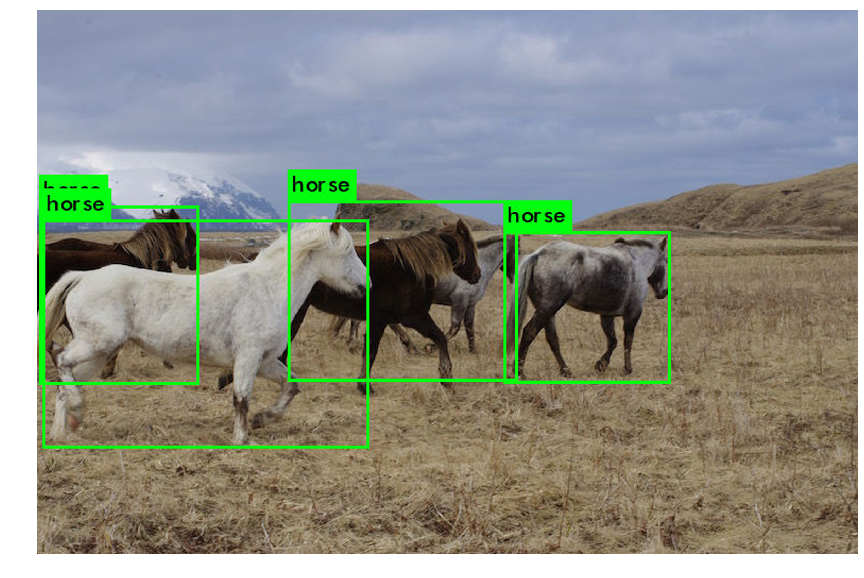

In [68]:
#The DOG, The TRUCK and The Bicycle!
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()




In [71]:
# Upload the video you want to use for object detection
# Please use a filename without spaces like test.mp4 etc.
%cd 
%cd darknet
!ls
%cd data
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)


/root
/root/darknet
3rdparty    darknet_video.py	   Makefile	    src
backup	    data		   net_cam_v3.sh    video_v2.sh
bad.list    image_yolov2.sh	   obj		    video_yolov3.sh
build	    image_yolov3.sh	   predictions.jpg  yolov3.weights
cfg	    include		   README.md
darknet     json_mjpeg_streams.sh  results
darknet.py  LICENSE		   scripts
/root/darknet/data


Saving good.mp4 to good.mp4
saved file good.mp4


In [72]:
# And finally run it! Please check if you have given the right video file name
%cd 
%cd darknet
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show data/good.mp4 -i 0 -out_filename res.avi
 

/root
/root/darknet
Demo
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x 

In [73]:
# Download the resulting video and use VLC to run it
!ls -all
files.download('res.avi')


total 289140
drwxr-xr-x 14 root root      4096 Feb  8 14:08 .
drwx------  1 root root      4096 Feb  8 13:35 ..
drwxr-xr-x  5 root root      4096 Feb  8 13:34 3rdparty
drwxr-xr-x  2 root root      4096 Feb  8 13:36 backup
-rw-r--r--  1 root root        14 Feb  8 13:56 bad.list
drwxr-xr-x  3 root root      4096 Feb  8 13:34 build
drwxr-xr-x  3 root root      4096 Feb  8 13:34 cfg
drwxr-xr-x  2 root root      4096 Feb  8 13:34 .circleci
-rwxr-xr-x  1 root root   2948640 Feb  8 13:37 darknet
-rw-r--r--  1 root root     16255 Feb  8 13:34 darknet.py
-rw-r--r--  1 root root      4010 Feb  8 13:34 darknet_video.py
drwxr-xr-x  3 root root      4096 Feb  8 14:04 data
drwxr-xr-x  8 root root      4096 Feb  8 13:34 .git
-rw-r--r--  1 root root       271 Feb  8 13:34 .gitignore
-rwxr-xr-x  1 root root       108 Feb  8 13:34 image_yolov2.sh
-rwxr-xr-x  1 root root       110 Feb  8 13:34 image_yolov3.sh
drwxr-xr-x  2 root root      4096 Feb  8 13:34 include
-rwxr-xr-x  1 root root       345 Feb  8 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 33220, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

# Here is a sample output:
https://www.youtube.com/watch?v=u0gxK6k1agM&feature=youtu.be



